# <font color='green'> An Analysis of Social Buzz Content Categories </font>

## <div class='alert alert-info'>Data Importation and Cleaning</div>

### Import Necessary Libraries

In [1]:
# Pandas is a powerful library for data manipulation and analysis.
import pandas as pd

# NumPy provides support for numerical operations on our data.
import numpy as np

# Matplotlib and Seaborn are used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options can be customized to control data display.
# Here, we set the maximum number of columns to display for better readability.
pd.set_option('display.max_columns', None)

# to turn off unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Next, we should check if the libraries were imported successfully.
# If there are no errors, we can proceed with loading and analyzing the data.
print("Libraries imported successfully!")

Libraries imported successfully!


### Load and Clean the Datasets

### 1. Content Data

In [2]:
# Define the file path to the dataset.
content_path = 'Content (Cleaned).csv'  

# Use Pandas to read the dataset into a DataFrame.
try:
    content_data = pd.read_csv(content_path)
    print("Dataset loaded successfully!")
    
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully!


In [3]:
content_data.head()

,Content Id,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,Photo,Healthy Eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,Photo,Healthy Eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,Photo,Technology
4,01ab84dd-6364-4236-abbb-3f237db77180,Video,Food


In [4]:
content_data.shape

(1000, 3)

In [5]:
content_data.columns.to_list()

['Content Id', 'Content Type', 'Category']

In [6]:
content_data.dtypes

Content Id      object
Content Type    object
Category        object
dtype: object

In [7]:
# Identify and remove duplicates
content_data.duplicated().sum()

0

In [8]:
content_data['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [9]:
content_data['Content Type'].unique()

array(['Photo', 'Video', 'Gif', 'Audio'], dtype=object)

In [10]:
content_data.nunique()

Content Id      1000
Content Type       4
Category          16
dtype: int64

In [11]:
#checking missing values
missing_values = content_data.isnull().sum()
missing_values

Content Id      0
Content Type    0
Category        0
dtype: int64

*No Missing Data are found*

### 2. Reactions data

In [12]:
# Define the file path to the dataset.
reactions_path = 'Reactions (Cleaned).csv'  

# Use Pandas to read the dataset into a DataFrame.
try:
    reactions_data = pd.read_csv(reactions_path)
    print("Dataset loaded successfully!")
    
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully!


In [13]:
reactions_data.head()

,Content Id,Reaction Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,11/7/2020 9:43
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Dislike,6/17/2021 12:22
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Scared,4/18/2021 5:13
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,1/6/2021 19:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Interested,8/23/2020 12:25


In [14]:
reactions_data.columns.to_list()

['Content Id', 'Reaction Type', 'Datetime']

In [14]:
reactions_data.shape

(24573, 3)

In [15]:
reactions_data.isnull().sum()

Content Id       0
Reaction Type    0
Datetime         0
dtype: int64

In [17]:
reactions_data.dtypes

Content Id       object
Reaction Type    object
Datetime         object
dtype: object

In [16]:
# Convert the datetime column to datetime datatype
reactions_data['Datetime'] = pd.to_datetime(reactions_data['Datetime'])

In [19]:
reactions_data.dtypes

Content Id               object
Reaction Type            object
Datetime         datetime64[ns]
dtype: object

In [17]:
reactions_data['Date'] = reactions_data['Datetime'].dt.date
reactions_data['Time'] = reactions_data['Datetime'].dt.time


In [18]:
reactions_data.drop('Datetime', axis =1, inplace = True)

In [22]:
reactions_data.head()

,Content Id,Reaction Type,Date,Time
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2020-11-07,09:43:00
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Dislike,2021-06-17,12:22:00
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Scared,2021-04-18,05:13:00
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-01-06,19:13:00
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,Interested,2020-08-23,12:25:00


In [23]:
reactions_data.dtypes

Content Id       object
Reaction Type    object
Date             object
Time             object
dtype: object

In [19]:
# Convert 'date_column' to datetime.date datatype
reactions_data['Date'] = pd.to_datetime(reactions_data['Date']).dt.date

# Convert 'time_column' to datetime.time datatype
reactions_data['Time'] = pd.to_datetime(reactions_data['Time'], format='%H:%M:%S').dt.time

In [25]:
reactions_data.tail()

,Content Id,Reaction Type,Date,Time
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,Dislike,2020-06-27,09:46:00
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,Intrigued,2021-02-16,17:17:00
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,Interested,2020-09-12,03:54:00
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,Worried,2020-11-04,20:08:00
24572,75d6b589-7fae-4a6d-b0d0-752845150e56,Cherish,2021-01-04,04:55:00


In [20]:
# Identify and remove duplicates
duplicate_count = reactions_data.duplicated().sum()
duplicate_count

0

*No Missing Values are found*

### 3. ReactionTypes Data

In [21]:
# Define the file path to the dataset.
reactiontypes_path = 'ReactionTypes(Cleaned).csv'  

# Use Pandas to read the dataset into a DataFrame.
try:
    reactiontypes_data = pd.read_csv(reactiontypes_path)
    print("Dataset loaded successfully!")
    
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully!


In [28]:
reactiontypes_data.head()

,Reaction Type,Sentiment,Score
0,Heart,Positive,60
1,Want,Positive,70
2,Disgust,Negative,0
3,Hate,Negative,5
4,Interested,Positive,30


In [29]:
reactiontypes_data.columns.to_list()

['Reaction Type', 'Sentiment', 'Score']

In [30]:
reactiontypes_data.shape

(16, 3)

In [31]:
reactiontypes_data

,Reaction Type,Sentiment,Score
0,Heart,Positive,60
1,Want,Positive,70
2,Disgust,Negative,0
3,Hate,Negative,5
4,Interested,Positive,30
5,Indifferent,Neutral,20
6,Love,Positive,65
7,Super Love,Positive,75
8,Cherish,Positive,70
9,Adore,Positive,72


*No Missing Values are found*

## <div class='alert alert-info'>Data Modeling</div>

### Creating a final data set by merging three tables together

In [22]:
# Merge the DataFrames: reactions_data, content_data, and reactiontypes_data

# Step 1: Inner merge between reactions_data and content_data based on 'Content Id'
# This merges the reactions_data and content_data DataFrames using 'Content Id' as the common column
merged_df1 = pd.merge(reactions_data, content_data, on='Content Id')

# Step 2: Inner merge between merged_df1 and reactiontypes_data based on 'Reaction Type'
# This merges the result of the first merge (merged_df1) with reactiontypes_data using 'Reaction Type' as the common column
final_df = pd.merge(merged_df1, reactiontypes_data, on='Reaction Type')

# The final result is stored in the 'final_df' DataFrame

In [23]:
final_df.head()

,Content Id,Reaction Type,Date,Time,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2020-11-07,09:43:00,Photo,Studying,Negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-01-06,19:13:00,Photo,Studying,Negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-04-09,02:46:00,Photo,Studying,Negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,Disgust,2021-03-28,21:15:00,Photo,Healthy Eating,Negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,Disgust,2020-08-04,05:40:00,Photo,Healthy Eating,Negative,0


In [34]:
final_df.shape

(24573, 8)

In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content Id     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Date           24573 non-null  object
 3   Time           24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.5+ MB


In [24]:
# Convert 'date_column' to datetime.date datatype
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Convert 'time_column' to datetime.time datatype
final_df['Time'] = pd.to_datetime(final_df['Time'], format='%H:%M:%S')

In [25]:
final_df.dtypes

Content Id               object
Reaction Type            object
Date             datetime64[ns]
Time             datetime64[ns]
Content Type             object
Category                 object
Sentiment                object
Score                     int64
dtype: object

In [38]:
final_df.columns.to_list()

['Content Id',
 'Reaction Type',
 'Date',
 'Time',
 'Content Type',
 'Category',
 'Sentiment',
 'Score']

In [39]:
# Specify the file path where you want to save the CSV file
file_path = 'D:\Data Box\Forage\Acenture\datasetmerged1.csv'

# Save the DataFrame to a CSV file
final_df.to_csv(file_path, index=False)

# Print a message indicating that the file has been saved
print(f"CSV file saved to: {file_path}")


CSV file saved to: D:\Data Box\Forage\Acenture\datasetmerged1.csv


## <div class='alert alert-info'>Exploratory Data Analysis</div>

## 1. Unique Catergories
### Q. How many unique categories are there?

In [36]:
# Extracting unique categories from the 'Category' column
unique_categories = final_df['Category'].unique()

# Creating a DataFrame with the unique categories
unique_categories_df = pd.DataFrame({'Unique Categories': unique_categories})

# Displaying the DataFrame
unique_categories_df

,Unique Categories
0,Studying
1,Healthy Eating
2,Dogs
3,Public Speaking
4,Science
5,Tennis
6,Food
7,Fitness
8,Soccer
9,Education


## 3. Top Content Categories
### Q. What are the five most prevalent content categories based on total scores?

In [27]:
# Group by 'Category' and sum the 'Score' for each category
category_scores = final_df.groupby('Category')['Score'].sum().reset_index()
catergory_scores = category_scores.sort_values(by='Score', ascending=False)
# Display the top 5 categories
Top_5 = category_scores.head(5)
Top_5

,Category,Score
0,Animals,74965
1,Cooking,64756
2,Culture,66579
3,Dogs,52511
4,Education,57436


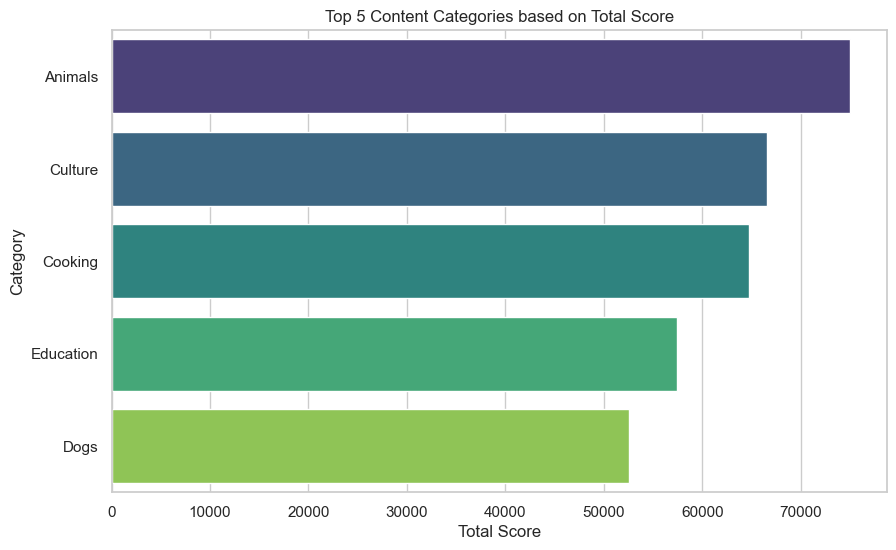

In [33]:
# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(y='Category',
            x='Score',
            data = Top_5,
            palette='viridis',
            order= Top_5.sort_values(by= 'Score', ascending=False)['Category'])

# Set labels and title
plt.ylabel('Category')
plt.xlabel('Total Score')
plt.title('Top 5 Content Categories based on Total Score')

# Show the plot
plt.show()

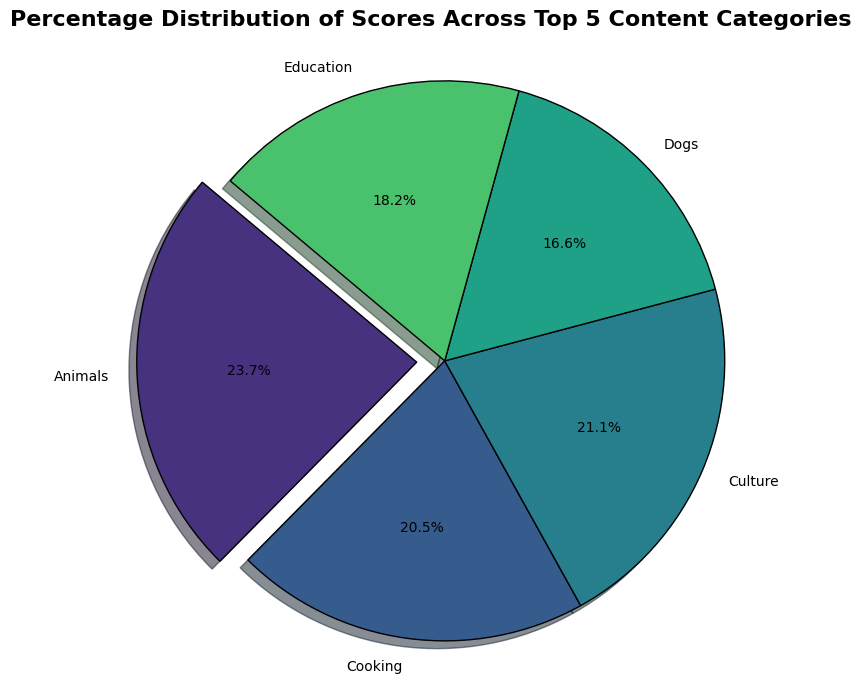

In [32]:
# Define explode values to highlight a specific category
explode = (0.1, 0, 0, 0, 0)  # Explode the first category (index 0)

# Define custom colors for the pie chart
colors = sns.color_palette('viridis')

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(Top_5['Score'], labels=Top_5['Category'], autopct='%1.1f%%', startangle=140, explode=explode, colors=colors, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage Distribution of Scores Across Top 5 Content Categories', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

Based on the provided result of the top 5 content categories and their corresponding total scores:

- **Animals (Score: 74965)**:
This category has the highest total score among the top 5, indicating a significant level of engagement or positive reception from the audience. Content related to animals appears to resonate well.

- **Cooking (Score: 64756)**:
The Cooking category follows closely, suggesting a substantial interest in culinary content. Viewers may find value in recipes, cooking tips, or food-related discussions within this category.

- **Culture (Score: 66579)**:
The Culture category has a strong total score, indicating that content related to cultural topics is well-received. This could encompass a broad range of subjects such as art, traditions, or societal discussions.

- **Dogs (Score: 52511)**:
The Dogs category, while slightly lower in total score compared to others in the top 5, still demonstrates a significant level of engagement. Content related to dogs, including pet care, training, or heartwarming stories, appears to be popular.

- **Education (Score: 57436)**:
The Education category rounds out the top 5, showcasing that content related to educational topics has garnered a notable total score. This may include informative articles, tutorials, or discussions on various subjects.

In summary, the top 5 content categories cover a diverse range of topics, from animals and cooking to culture, dogs, and education. The high scores suggest a positive audience response and engagement across these thematic areas. Understanding these popular categories can inform content creation and strategy to cater to the interests of the audience.

 ## 3. Reactions to Popular Category
 ### Q. How many reactions are there to the most popular category?

In [60]:
# Grouping the data by 'Category' and counting the reactions for each category
category_reactions = final_df.groupby('Category')['Reaction Type'].count()
# Sorting the values in descending order
category_reactions_sorted = category_reactions.sort_values(ascending=False)
category_reactions_sorted 

Category
Animals            1897
Science            1796
Healthy Eating     1717
Food               1699
Technology         1698
Culture            1676
Cooking            1664
Travel             1647
Soccer             1457
Education          1433
Fitness            1395
Studying           1363
Dogs               1338
Tennis             1328
Veganism           1248
Public Speaking    1217
Name: Reaction Type, dtype: int64

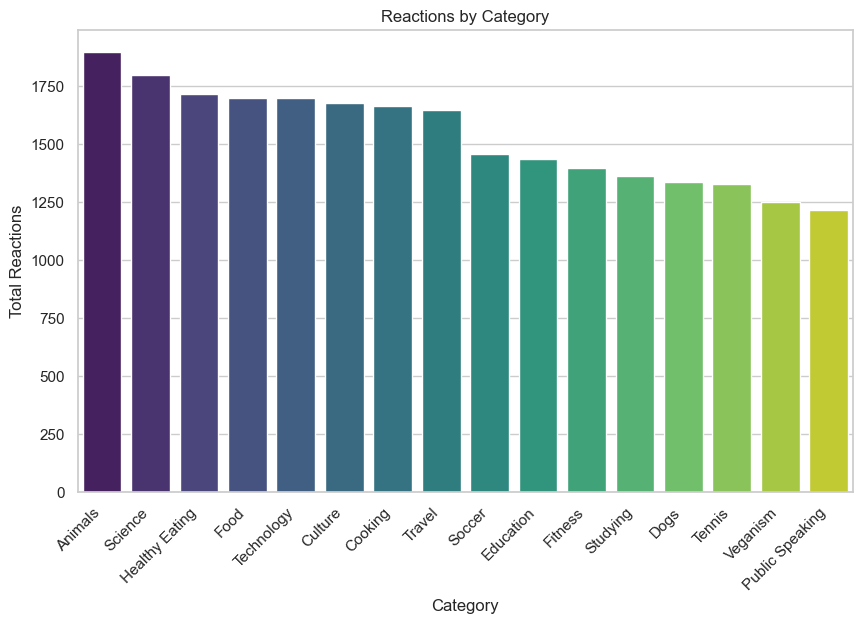

In [59]:
# Creating a bar plot using Seaborn if visualization is needed
plt.figure(figsize=(10, 6))

sns.barplot(x=category_reactions_sorted.index, y=category_reactions_sorted.values, palette='viridis')

plt.title('Reactions by Category')
plt.xlabel('Category')
plt.ylabel('Total Reactions')
plt.xticks(rotation=45, ha='right')

plt.show()


The most popular content categories, based on the count of reactions, are 'Animals' with 1897 reactions, followed by 'Science', 'Healthy Eating', 'Food', 'Technology', and 'Culture'. These categories demonstrate high user engagement on the Social Buzz platform.

## 4. Month with Highest Posts:
### Q. Which month witnessed the highest number of post?

In [66]:
# Extract month and year from the 'Date' column
final_df['Month'] = final_df['Date'].dt.month
final_df['Year'] = final_df['Date'].dt.year

In [67]:
final_df.head()

,Content Id,Reaction Type,Date,Time,Content Type,Category,Sentiment,Score,Month,Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2020-11-07,1900-01-01 09:43:00,Photo,Studying,Negative,0,11,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-01-06,1900-01-01 19:13:00,Photo,Studying,Negative,0,1,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,Disgust,2021-04-09,1900-01-01 02:46:00,Photo,Studying,Negative,0,4,2021
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,Disgust,2021-03-28,1900-01-01 21:15:00,Photo,Healthy Eating,Negative,0,3,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,Disgust,2020-08-04,1900-01-01 05:40:00,Photo,Healthy Eating,Negative,0,8,2020


In [72]:
# Grouping the data by month and counting the number of posts
monthly_posts = final_df.groupby(['Year', 'Month']).size().reset_index(name='Post Count')
monthly_posts.sort_values(by='Year', ascending= True)

,Year,Month,Post Count
0,2020,6,892
1,2020,7,2070
2,2020,8,2114
3,2020,9,2022
4,2020,10,2056
5,2020,11,2034
6,2020,12,2092
7,2021,1,2126
8,2021,2,1914
9,2021,3,2012


In [73]:
# Finding the month with the highest number of posts
max_month = monthly_posts.loc[monthly_posts['Post Count'].idxmax()]

# Printing the result
print(f"The month with the highest number of posts is {max_month['Month']}/{max_month['Year']} with {max_month['Post Count']} posts.")

The month with the highest number of posts is 5/2021 with 2138 posts.


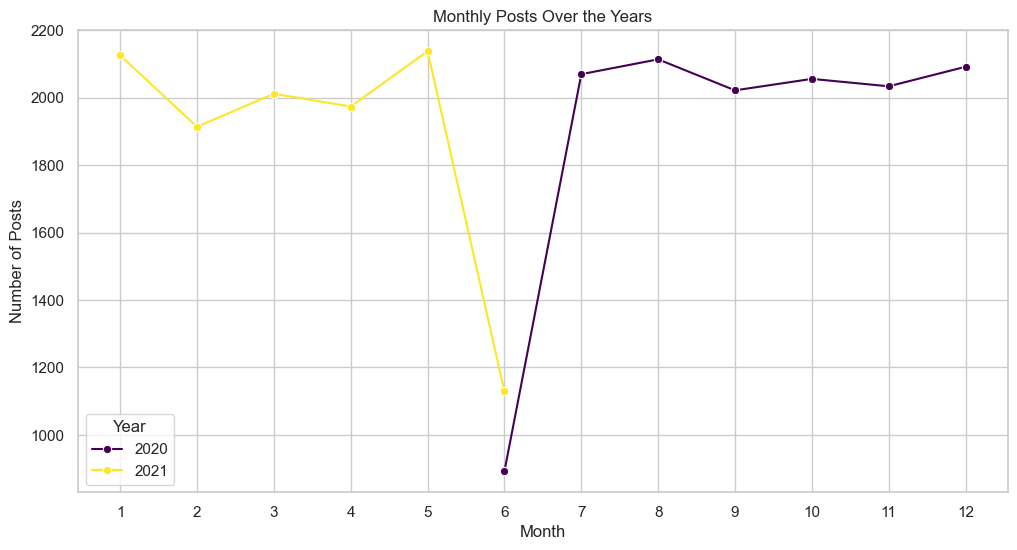

In [79]:
# Creating a line plot using Seaborn 
plt.figure(figsize=(12, 6))

sns.lineplot(x='Month', y='Post Count', hue='Year', data=monthly_posts, palette='viridis', marker='o', sort=False)

plt.title('Monthly Posts Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Posts')

plt.legend(title='Year')
plt.xticks(range(1, 13))  # Ensure all months are displayed on the x-axis

plt.show()

The month with the highest number of posts is May 2021 with 2138 posts.

## Author
**[Mostafizur Rahman](https://www.linkedin.com/in/mostafizrahman10/)**

## <h3 align="center"> © 2024 Mostafizur Rahamn. All rights reserved. <h3/>